<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_05_Customer_Churn_classification_with_ANN/Project_05_Customer_Churn_classification_with_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Churn classification with ANN**

# **Importing Required Libraries**

In [2]:
# Importing Required Libraries

import numpy as np # Used for numerical operations
import pandas as pd # Used for data manipulation and analysis

import os # Provides a way of using operating system dependent functionality
import matplotlib.pyplot as plt # Used for creating static, interactive and animated visualizations
import seaborn as sns # Used for drawing attractive statistical graphics

#ml tools
from sklearn.preprocessing import StandardScaler # Used to standardize features by removing the mean and scaling to unit variance
from sklearn.model_selection import train_test_split # Used to split data into training and testing sets

# dl tools
from keras.models import Sequential # Used to create a linear stack of layers
from keras.layers import Dense # Used to create a densely connected neural network layer

# **Data loading Using pandas**

In [3]:
# Data loading Using pandas

# Load the CSV file into a pandas DataFrame, using 'RowNumber' as the index column
churn_data = pd.read_csv('/content/Churn_Modelling (1).csv', index_col='RowNumber')

In [4]:
# Display the first 5 rows of the DataFrame
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
# Get information about the DataFrame, including data types and non-null values
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# Generate descriptive statistics of the DataFrame
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
# Drop the 'CustomerId' and 'Surname' columns as they are not needed for the analysis
churn_data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [8]:
# Display the first 5 rows of the DataFrame after dropping columns
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Display the first 5 rows of the DataFrame again
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#**Encoding**

In [10]:
# Encoding

# Get the value counts for the 'Geography' column to see the distribution of categories
churn_data['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [11]:
# Encoding

# Map the categorical 'Geography' column to numerical values
churn_data['Geography'] = churn_data['Geography'].map({'France':0, 'Spain':2, 'Germany':1})
# Map the categorical 'Gender' column to numerical values
churn_data['Gender'] = churn_data['Gender'].map({'Female':0, 'Male':1})

In [12]:
# Encoding

# Create a copy of the churn_data DataFrame after encoding to preserve the original data
churn_data_encoded = churn_data.copy()

In [13]:
# Encoding

# Display the first 5 rows of the encoded DataFrame
churn_data_encoded.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88,1
2,608,2,0,41,1,83807.86,1,0,1,112542.58,0
3,502,0,0,42,8,159660.80,3,1,0,113931.57,1
4,699,0,0,39,1,0.00,2,0,0,93826.63,0
5,850,2,0,43,2,125510.82,1,1,1,79084.10,0


#**EDA**

Text(0.5, 1.0, 'Count of Exited Customers')

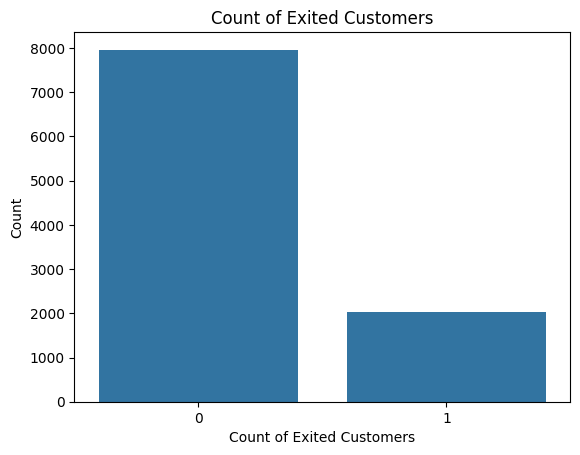

In [14]:
# Create a countplot of the 'Exited' column to visualize the distribution of churned vs. non-churned customers
sns.countplot(x='Exited', data=churn_data)
plt.xlabel('Count of Exited Customers')
plt.ylabel('Count')
plt.title('Count of Exited Customers')

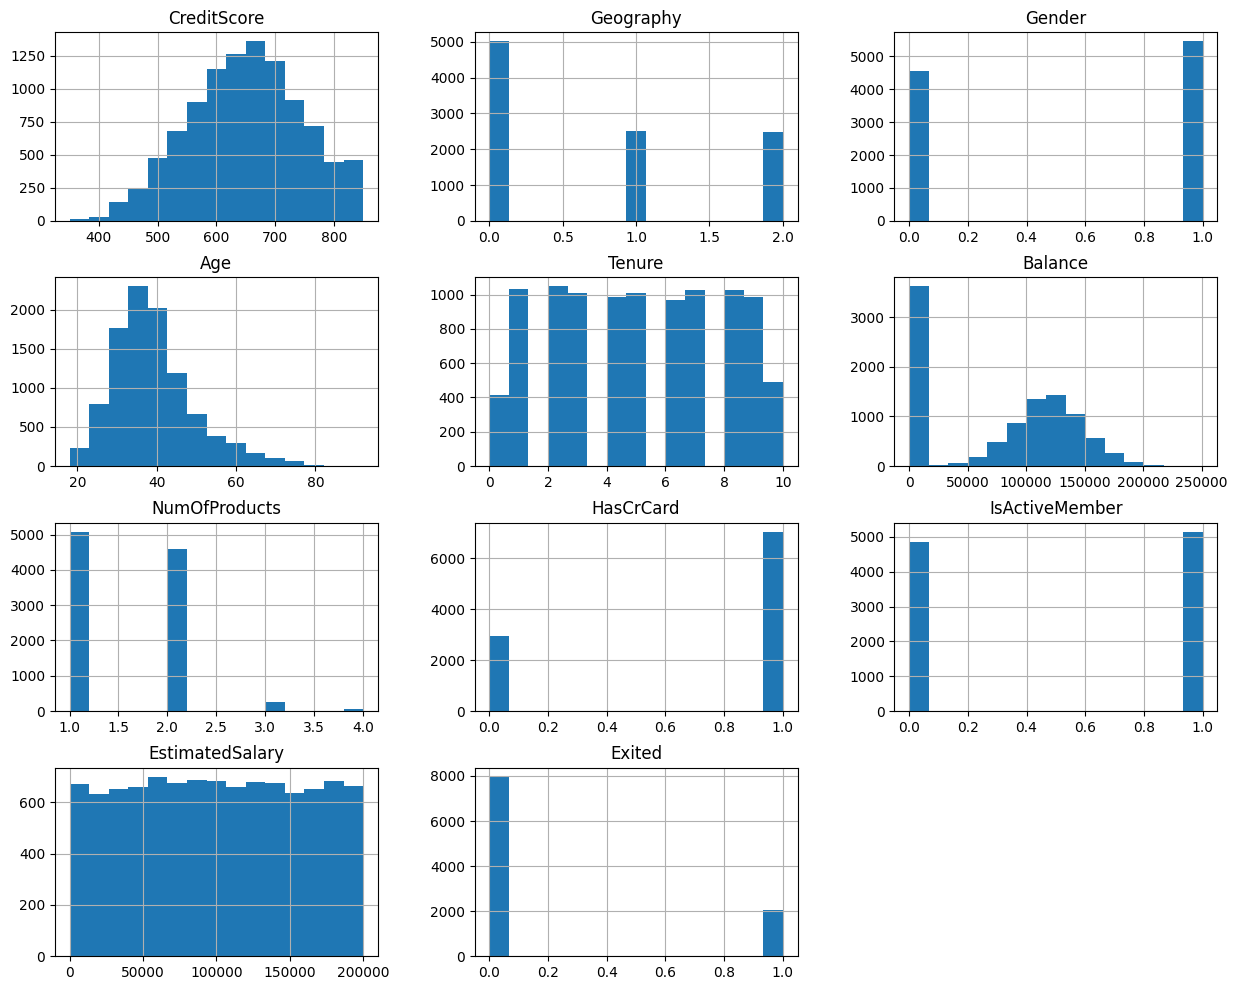

In [15]:
# EDA

# Generate histograms for all numerical features in the encoded DataFrame to visualize their distributions
churn_data_encoded.hist(figsize=(15,12), bins=15)
plt.title('Features Distributions')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

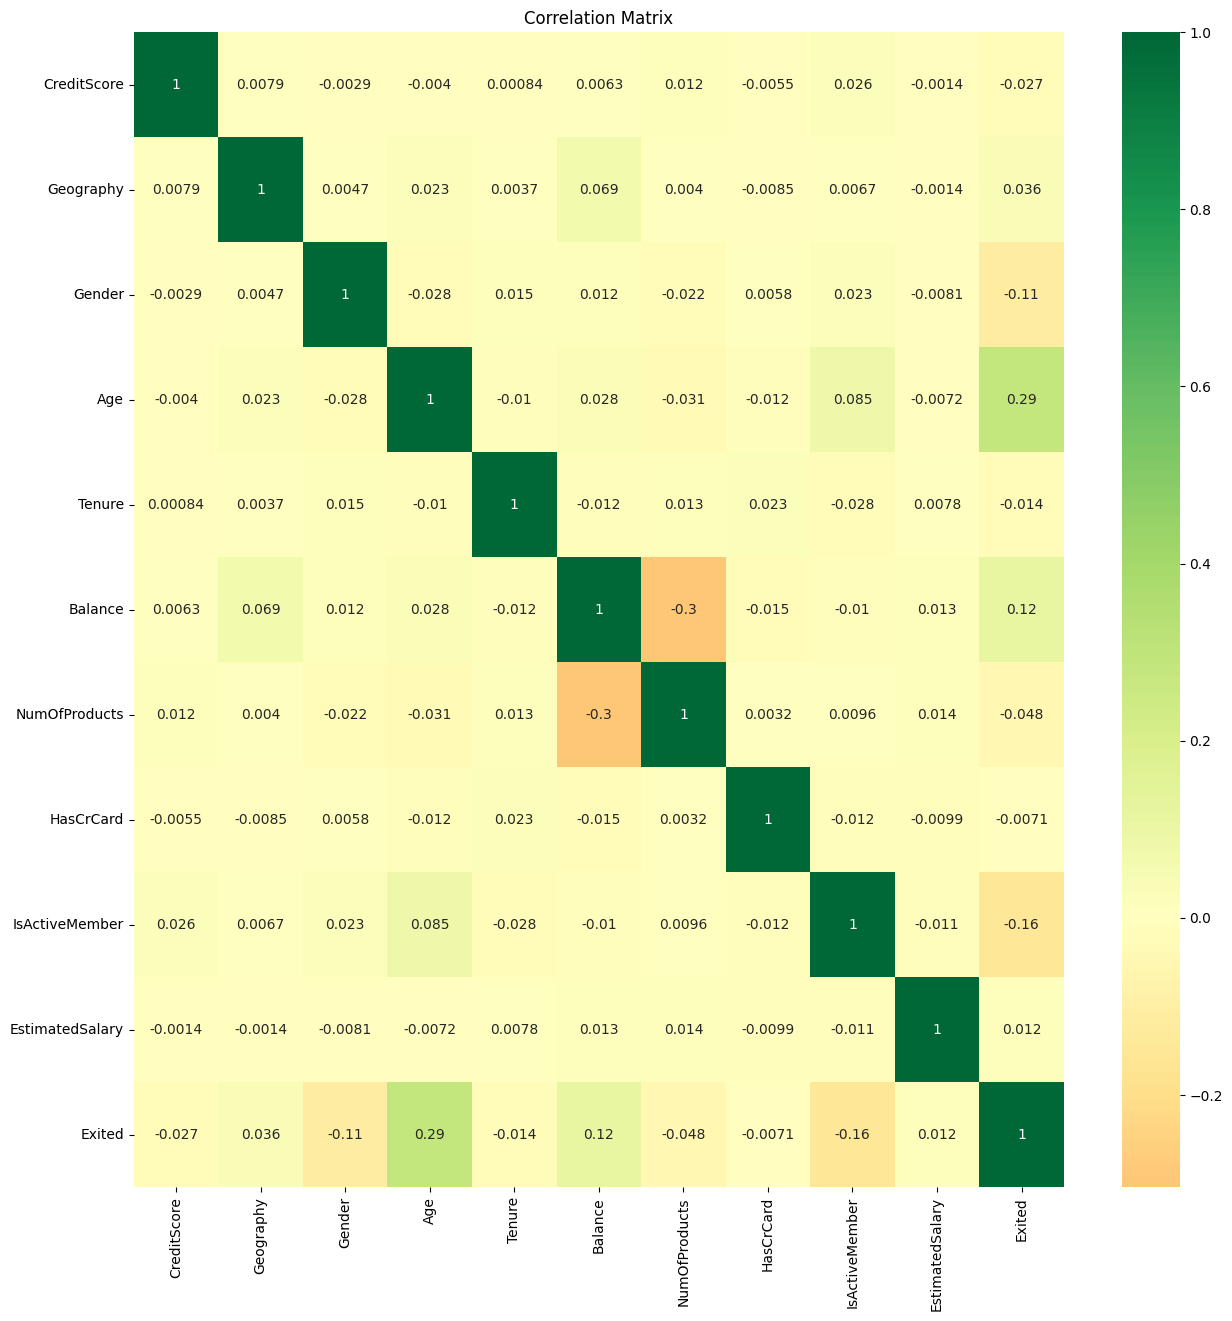

In [16]:
# EDA

# Create a heatmap to visualize the correlation matrix of the encoded DataFrame
plt.figure(figsize=(15, 15))
sns.heatmap(churn_data_encoded.corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('Correlation Matrix')

#**Train Test split**

In [20]:
# Train Test split

# Separate the features (x) and the target variable (y)
x = churn_data_encoded.drop(['Exited'], axis=1) # Features are all columns except 'Exited'
y = churn_data_encoded.Exited # Target variable is 'Exited'

In [21]:
# Display the first 5 rows of the features DataFrame (x)
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
RowNumber,,,,,,,,,,
1,619,0,0,42,2,0.00,1,1,1,101348.88
2,608,2,0,41,1,83807.86,1,0,1,112542.58
3,502,0,0,42,8,159660.80,3,1,0,113931.57
4,699,0,0,39,1,0.00,2,0,0,93826.63
5,850,2,0,43,2,125510.82,1,1,1,79084.10


In [22]:
# Display the target variable Series (y)
y

,Exited
RowNumber,
1,1
2,0
3,1
4,0
5,0
...,...
9996,0
9997,0
9998,1


In [23]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing
# random_state=0 ensures reproducibility of the split
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.2, random_state = 0)

In [24]:
# Standardize the features using StandardScaler
# Fit the scaler on the training data and transform both training and testing data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)